In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('yield_df.csv')

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.shape

(28242, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
df.isnull().sum()


,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.duplicated().sum()

0

In [ ]:
def isStr(obj):
  try:
    float(obj)
    return False
  except:
    return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [ ]:
df=df.drop(to_drop)

In [ ]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

In [ ]:

len(df['Area'].unique())

101

<Axes: xlabel='count', ylabel='Area'>

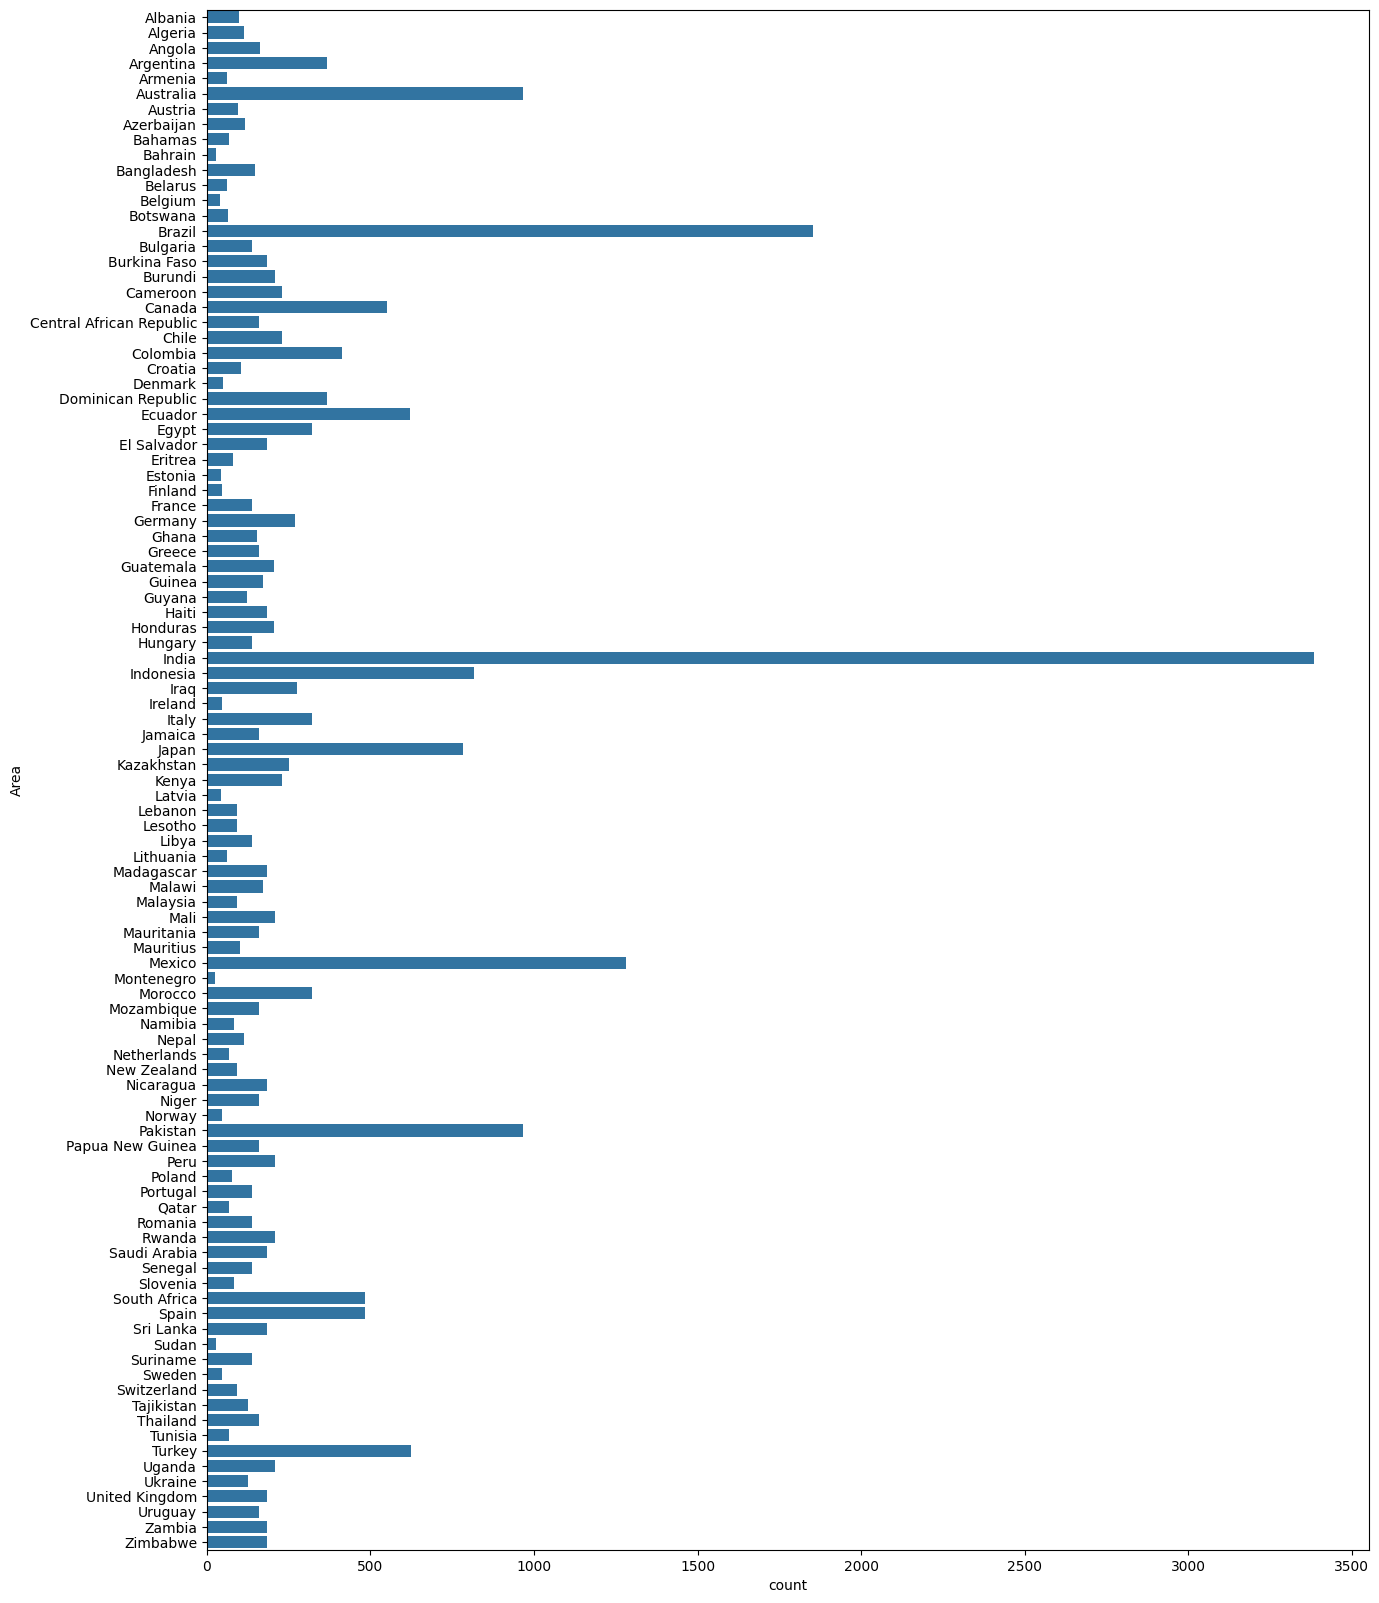

In [ ]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])

In [ ]:
(df['Area'].value_counts() < 500).sum()

91

In [ ]:
country = df['Area'].unique()
yield_per_country=[]
for state in country:
  yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [ ]:
df['hg/ha_yield'].sum()

1996196943

In [ ]:
yield_per_country

[5711536.0,
 6711464.0,
 5722563.0,
 32864032.0,
 4524100.0,
 109111062.0,
 10852258.0,
 4608380.0,
 4384717.0,
 4443889.0,
 7720159.0,
 4704812.0,
 8442270.0,
 470651.0,
 136340329.0,
 6263075.0,
 6083337.0,
 7031146.0,
 10717883.0,
 34706922.0,
 4255627.0,
 20561214.0,
 26927138.0,
 6083167.0,
 10701651.0,
 25312166.0,
 21315591.0,
 36828848.0,
 16855944.0,
 1452416.0,
 3595638.0,
 6210668.0,
 15790618.0,
 38780463.0,
 9260371.0,
 14571925.0,
 16508723.0,
 7975743.0,
 8361103.0,
 8619194.0,
 10920131.0,
 8824110.0,
 274219558.0,
 68067328.0,
 10984722.0,
 9104030.0,
 32280700.0,
 19698007.0,
 100924145.0,
 9965212.0,
 14391737.0,
 3698588.0,
 6956804.0,
 4258932.0,
 9016288.0,
 4174348.0,
 6103523.0,
 8346715.0,
 7934982.0,
 15106720.0,
 4465841.0,
 12684212.0,
 1775914.0,
 0.0]

<Axes: >

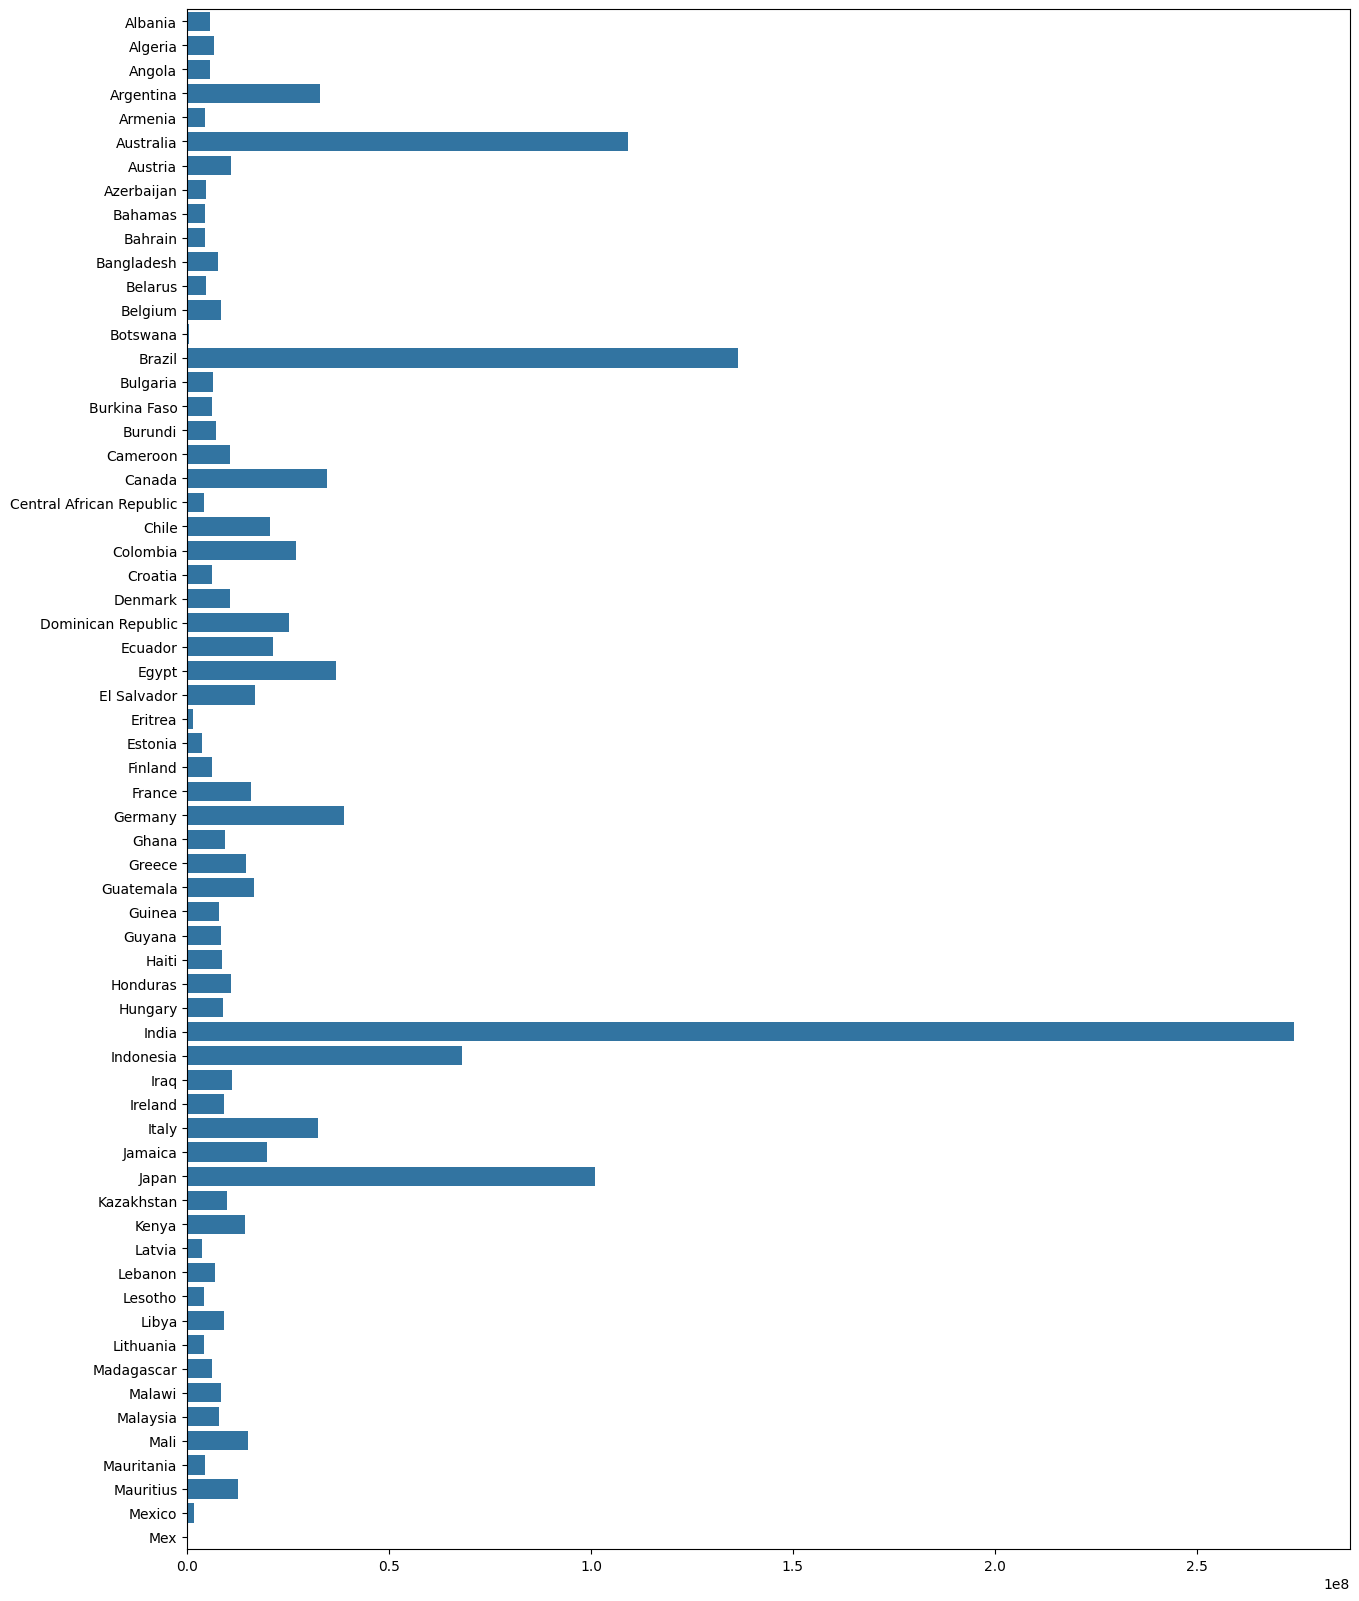

In [ ]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

<Axes: xlabel='count', ylabel='Item'>

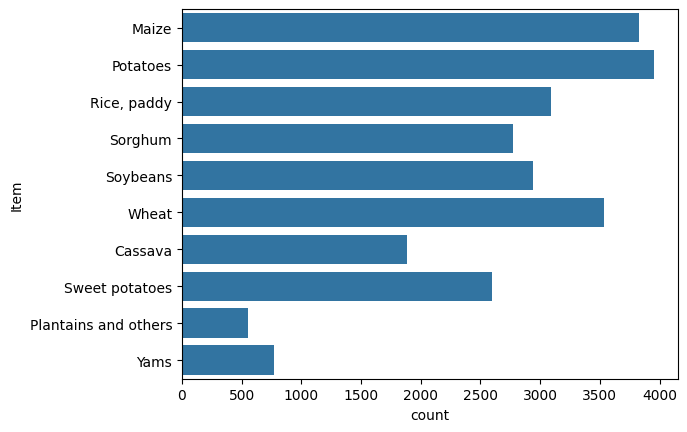

In [ ]:
sns.countplot(y=df['Item'])

In [ ]:
crops=(df['Item'].unique())

In [ ]:
yield_per_crop=[]
for crop in crops:
  yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

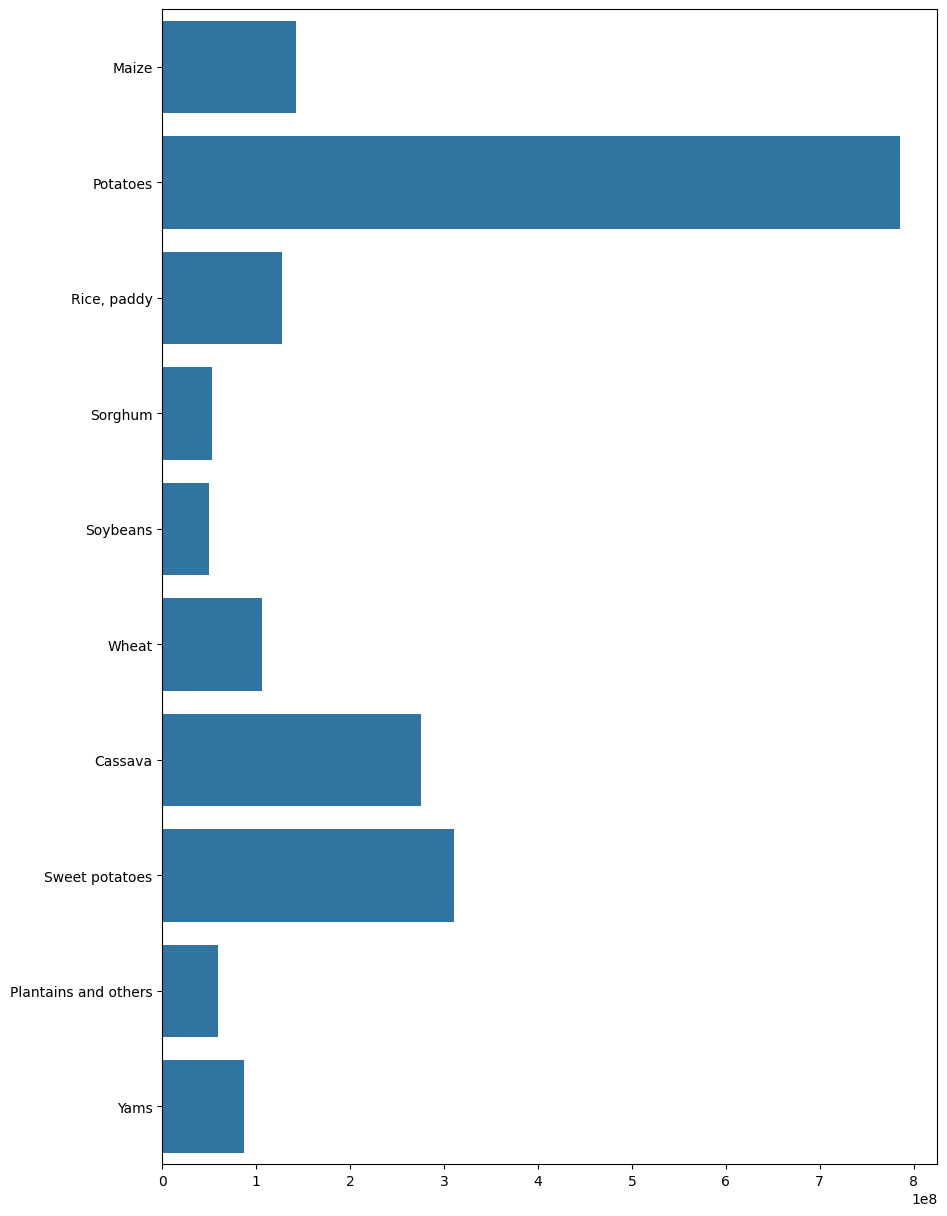

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(y=crops,x=yield_per_crop)

In [ ]:
col=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df=df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [ ]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [ ]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)

    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 15011., 34879., 77391.])

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
result

array([36613.])

In [ ]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [ ]:
import sklearn
sklearn.__version__

'1.5.2'